# Naive Bayes Classifier  

Assumed a town that contains only kids and adults. Each person in this town is associated with two attributes, height and weight that take on values from $\mathbb{R}$. Height and weight are conditionally independent given the category (adult or kid). Let $X$ be the random variable denoting a pair of height-weight values and $Y$ be the random variable denoting a person in this town. Let $X_1$ and $X_2$ denote the random variables that take as values $x_1$ and $x_2$ when $X=(x_1,x_2)$.  Assume that $Y$ is a binary random variable that takes on values $kid=0$ or $adult=1$ depending on whether the person is a kid or an adult. The probability that a random person in this town is a kid is given by $P(Y=kid)=pKid$ and the probability that a random person in this town is an adult is given by $P(Y=adult)=pAdult=1-pKid$.

The conditional probability of height and weight given that a person is a kid or adult is given as follows. For $x=(x_1,x_2) \in \mathbb{R}^2$ with $x_1$ denoting the height and $x_2$ denoting the weight,

*   $P(X_1=x_1 ~|~ Y=kid)=f_{\mu_{11},\sigma_{11}}(x_1)$ and $P(X_2=x_2 ~|~ Y=kid)=f_{\mu_{12},\sigma_{12}}(x_2)$
*   $P(X_1=x_1 ~|~ Y=adult)=f_{\mu_{21},\sigma_{21}}(x_1)$ and $P(X_2=x_2 ~|~ Y=adult)=f_{\mu_{22},\sigma_{22}}(x_2)$
 
where $f_{\mu,\sigma}(z)=\frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{1}{2} \left( \frac{z-\mu}{\sigma} \right)^2}$. As height and weight are conditionally independent given the category, it follows that $P(X=x ~|~ Y=kid)=f_{\mu_{11},\sigma_{11}}(x_1) f_{\mu_{12},\sigma_{12}}(x_2)$ and $P(X=x ~|~ Y=adult)=f_{\mu_{21},\sigma_{21}}(x_1) f_{\mu_{22},\sigma_{22}}(x_2)$.


(a) assumed therer are 1000 people in this town and $pKid=.3$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.7,\mu_{12}=20,\mu_{21}=5,\mu_{22}=43$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. The histogram of valid heights across the groups, the histogram of weights across the groups and the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 

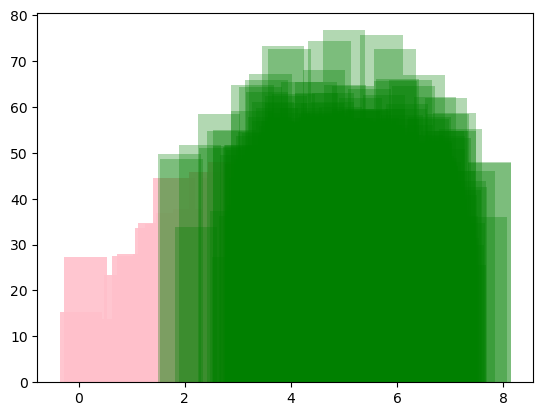

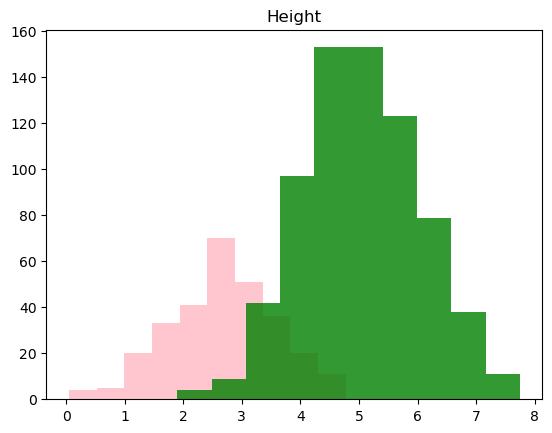

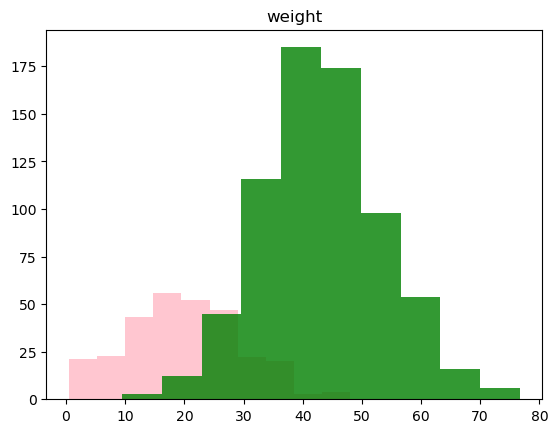

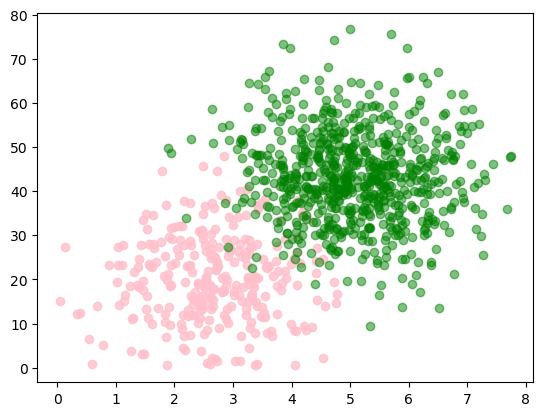

In [79]:

h_kid,w_kid,h_adult,w_adult=[],[],[],[]          
num = [0,1]                
k = choice(num,1000,p=[0.3,0.7])
mu11=2.7
mu12=20
mu21=5
mu22=43
sigma11=sigma21=1
sigma12=sigma22=10
for i in k:
    if(i==0):
        h_kid.append(abs(np.random.normal(mu11,sigma11)))         #height and weight based on given mu and sigma 
        w_kid.append(abs(np.random.normal(mu12,sigma12)))
    else:
        h_adult.append(abs(np.random.normal(mu21,sigma21)))
        w_adult.append(abs(np.random.normal(mu22,sigma22)))       
plt.bar(h_kid,w_kid,color="pink",alpha=0.9)                      
plt.bar(h_adult,w_adult,color="green",alpha=0.3)
plt.show()
plt.hist(h_kid,color="pink",alpha=0.9)
plt.hist(h_adult,color="green",alpha=0.8)
plt.title('Height')
plt.show()
plt.hist(w_kid,color="pink",alpha=0.9)
plt.hist(w_adult,color="green",alpha=0.8)
plt.title('weight')
plt.show()
plt.scatter(h_kid,w_kid,color="pink",alpha=0.8)
plt.scatter(h_adult,w_adult,color="green",alpha=0.5)
plt.show()

(b) Implemented an agent that observes the 1000 samples generated in part (a) and computes the fraction $pK$ of kids. Computed the mean and standard deviation of heights and weights for samples that are kids. These values $\mu'_{11},\sigma'_{11},\mu'_{12}$ and $\sigma'_{12}$ are the estimates for $\mu_{11},\sigma_{11},\mu_{12}$ and $\sigma_{12}$. Compute similar estimates $\mu'_{21},\sigma'_{21},\mu'_{22}$ and $\sigma'_{22}$ for $\mu_{21},\sigma_{21},\mu_{22}$ and $\sigma_{22}$.



In [67]:
sum_h_kid,sum_h_adult,sum_w_kid,sum_w_adult=0,0,0,0
sq_h_kid1,sq_h_adult1,sq_w_kid1,sq_w_adult1=0,0,0,0
kids=0
for i in k:
    if(i==0):
        kids+=1
p_kid=kids/1000
print(p_kid)
for i in h_kid:
    sum_h_kid+=i     #calculating sum
    sq_h_kid1+=(i**2)
for i in w_kid:
    sum_w_kid+=i
    sq_w_kid1+=(i**2)  #calculating squares of sum
for i in h_adult:
    sum_h_adult+=i
    sq_h_adult1+=(i**2)
for i in w_adult:
    sum_w_adult+=i
    sq_w_adult1+=(i**2)
mun11=sum_h_kid/len(h_kid)     #caluclating new means and standard deviations
mun12=sum_w_kid/len(w_kid)
mun21=sum_h_adult/len(h_adult)
mun22=sum_w_adult/len(w_adult)
sigman11=((sq_h_kid1/len(h_kid))-((sum_h_kid/len(h_kid))**2))**0.5               
sigman12=((sq_w_kid1/len(w_kid))-((sum_w_kid/len(w_kid))**2))**0.5
sigman21=((sq_h_adult1/len(h_adult))-((sum_h_adult/len(h_adult))**2))**0.5
sigman22=((sq_w_adult1/len(w_adult))-((sum_w_adult/len(w_adult))**2))**0.5
print(mun11,sigman11)
print(mun12,sigman12)
print(mun21,sigman21)
print(mun22,sigman22)

0.301
2.7232927764917765 0.9493036080357959
20.38544126032932 9.850176401750543
4.975526042667688 1.043257501141681
42.8567246776254 9.918488684754234


(c) Implemented an agent that classifies each sample generated in part (a) as kid or adult using the estimates computed in part (b) and Bayes' Rule. That is, the classification of a person with attributes $x=(x_1,x_2)$ into $adult$ or $kid$ is based on the values $pK \cdot f_{\mu'_{11},\sigma'_{11}}(x_1) f_{\mu'_{12},\sigma'_{12}}(x_2)$ and $(1-pK) \cdot f_{\mu'_{21},\sigma'_{21}}(x_1) f_{\mu'_{22},\sigma'_{22}}(x_2)$. Measure the accuracy of the classifier. Give the scatter plot of the 1000 samples (height in the X-axis and weight in the Y-axis).





95.4 %


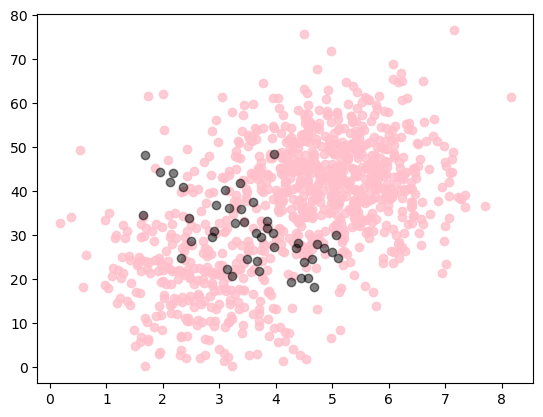

In [71]:
height_wight_kid={}
height_weight_adult={}
c1=0
e=2.7182818284590  #value of e
pix=0.3989422804014  #value of 1/root 2*pi
hk_correct,wk_correct=[],[]
ha_correct,wa_correct=[],[]
hk_wrong,wk_wrong,ha_wrong,wa_wrong=[],[],[],[]
for i in range(len(h_kid)-1):
    height_wight_kid[h_kid[i]]=w_kid[i]  #assigning corresponding height to corresponding weight 
for i in range(len(h_adult)-1):
    height_weight_adult[h_adult[i]]=w_adult[i]
for i in height_weight_adult.keys():
    pkid=(p_kid)*(pix/sigman11)*((e)**((-0.5)*(((i-mun11)/sigman11)**2)))*(pix/sigman12)*((e)**((-0.5)*(((height_weight_adult[i]-mun12)/sigman12)**2)))
    padult=(1-p_kid)*(pix/sigman21)*((e)**((-0.5)*(((i-mun21)/sigman21)**2)))*(pix/sigman22)*((e)**((-0.5)*(((height_weight_adult[i]-mun22)/sigman22)**2)))
    if(padult>pkid):
        ha_correct.append(i)       #caluclating no.of correct
        wa_correct.append(height_weight_adult[i])
        c1+=1
    else:
        ha_wrong.append(i)        #no.of wrong
        wa_wrong.append(height_weight_adult[i])
for i in height_wight_kid.keys():
    pkid=(p_kid)*(pix/sigman11)*((e)**((-0.5)*(((i-mun11)/sigman11)**2)))*(pix/sigman12)*((e)**((-0.5)*(((height_wight_kid[i]-mun12)/sigman12)**2)))
    padult=(1-p_kid)*(pix/sigman21)*((e)**((-0.5)*(((i-mun21)/sigman21)**2)))*(pix/sigman22)*((e)**((-0.5)*(((height_wight_kid[i]-mun22)/sigman22)**2)))
    if(pkid>padult):
        hk_correct.append(i)
        wk_correct.append(height_wight_kid[i])
        c1+=1
    else:
        hk_wrong.append(i)
        wk_wrong.append(height_wight_kid[i])    
print(str(c1/10)+' %')
plt.scatter(hk_correct,wk_correct,color='pink',alpha=0.8)  #total correct in pink
plt.scatter(ha_correct,wa_correct,color='pink',alpha=0.8)
plt.scatter(hk_wrong,wk_wrong,color='black',alpha=0.5) #wrong in black
plt.scatter(ha_wrong,wa_wrong,color='black',alpha=0.5)
plt.show()